# Autoencodeur

Aujourd'hui, nous allons apprendre ensemble à construire un autoencodeur simple en utilisant TensorFlow et Keras.
Un autoencodeur est un réseau de neurones conçu pour apprendre à compresser des données en un vecteur de petite dimension
(appelé représentation latente), puis à les reconstruire. C'est un peu comme un système de compression et de décompression d'images.
L'objectif est de compresser les images d'entrée tout en conservant un maximum d'informations utiles.
À la fin, vous serez capables de visualiser les images d'origine et les images reconstruites pour juger de la qualité de l'autoencodeur.

## Import dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## 1. Chargement des données MNIST

<blockquote>
Comme nous avons vu au workshops précédents MNIST est une base de données contenant des chiffres manuscrits (0 à 9) en noir et blanc.

On charge les images d'entraînement directement depuis Keras.

</blockquote>

In [ ]:
# CHARGER LES DONNEES DE MNIST - A COMPLETER  

print("Données MNIST chargées avec succès !")

Données MNIST chargées avec succès !


In [3]:
image_shape = # A COMPLETER
print(f"Les images sont des matrices {image_shape} avec des valeurs de 0 à 2^8 = 255.")

image_h = # A COMPLETER
image_w = # A COMPLETER

Les images sont des matrices (28, 28) avec des valeurs de 0 à 2^8 = 255.


## 2. Data processing

### 2.1 Scale data : Normalisation des données 

<blockquote>
On normalise ces valeurs pour les rendre entre 0 et 1, ce qui aide l'entraînement.
</blockquote>

In [4]:
train_images = # A COMPLETER
test_images = # A COMPLETER

### 2.2 Aplatir les images (28x28 -> 784)

In [5]:
train_images = # A COMPLETER
test_images = # A COMPLETER

## 3. Construire le modèle : Définition de l'autoencodeur

Un autoencodeur est composé de deux parties principales :
* L'encodeur, qui compresse l'image en un vecteur de petite dimension.
* Le décodeur, qui reconstruit l'image à partir de ce vecteur compressé.

<img src="autoencodeur_architecture.png" width="900">

In [6]:
def build_autoencoder():
    # Encodeur
    encoder = models.Sequential([
        # A COMPLETER
    ])

    # Décodeur
    decoder = models.Sequential([
        # A COMPLETER
    ])

    # Autoencodeur complet
    autoencoder = models.Sequential([encoder, decoder])
    return autoencoder

In [ ]:
autoencoder = build_autoencoder()

# definir l'algorithme d'optimisation et la fonction loss 
optimizer = #A COMPLETER
loss = #A COMPLETER 

autoencoder.compile(optimizer=optimizer, loss=loss)

## 4. Entraînement de l'autoencodeur

On définit ici quelques paramètres pour l'entraînement :
- batch_size : nombre d'images traitées en parallèle
- epochs : nombre d'itérations sur l'ensemble des données

In [8]:
epochs = 5
batch_size = 64 

In [9]:
history = autoencoder.fit(# A completer
                            )

Epoch 1/5

938/938 [==============================] - 5s 5ms/step - loss: 0.0371 - val_loss: 0.0209
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0186 - val_loss: 0.0160
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0150 - val_loss: 0.0135
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0121 - val_loss: 0.0113


## 5. Sauvegarder le modèle 

In [10]:
import os 

# 💾 Création du dossier pour enregistrer les résultats
# On vérifie si le dossier existe déjà, sinon on le crée.
SAVE_DIR = "autoencodeur_results"
os.makedirs(SAVE_DIR, exist_ok=True)

In [11]:
# A COMPLETER : sauvegarder le model dans le dossier SAVE_DIR

c:\Users\gbencheikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5. Évaluation

In [12]:
loss = autoencoder.evaluate(test_images, test_images, verbose=True)

313/313 [==============================] - 1s 2ms/step - loss: 0.0113


### 5.1 Plot metrics

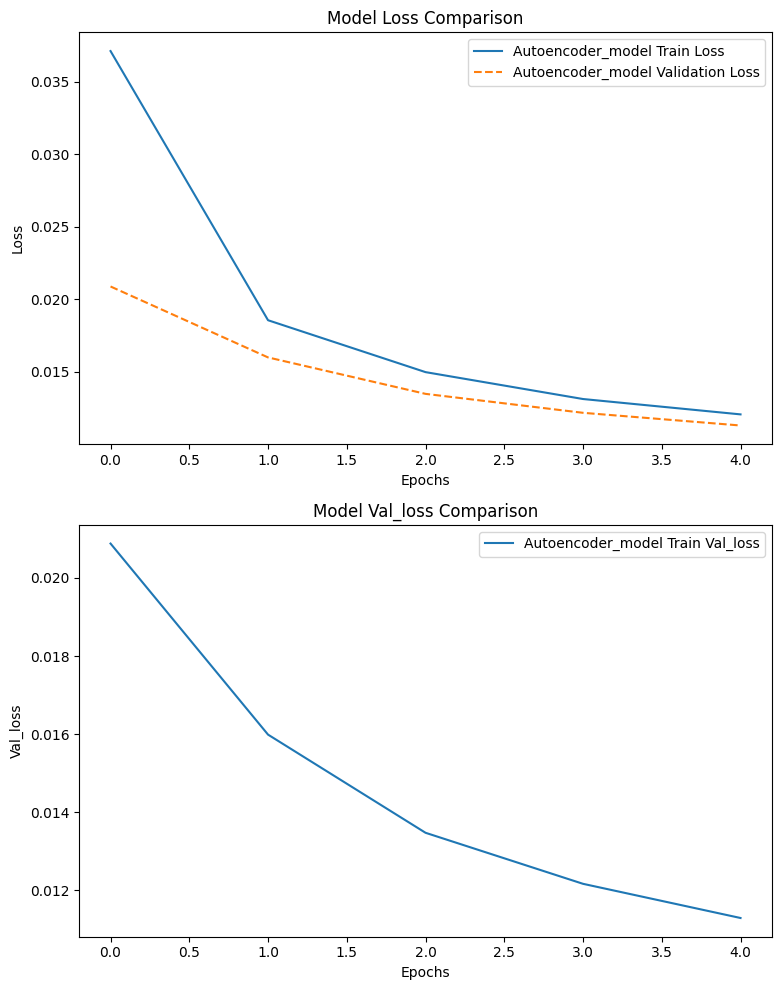

In [ ]:
from utils import *

plot_all_metrics({"Autoencoder_model": history}, SAVE_DIR, "model_loss_plot.png")

# Reconstruire des images

In [19]:
reconstructed = autoencoder.predict(test_images, verbose=True)

313/313 [==============================] - 1s 2ms/step


## 6. Visualisation des résultats

On compare quelques images originales avec leurs reconstructions.

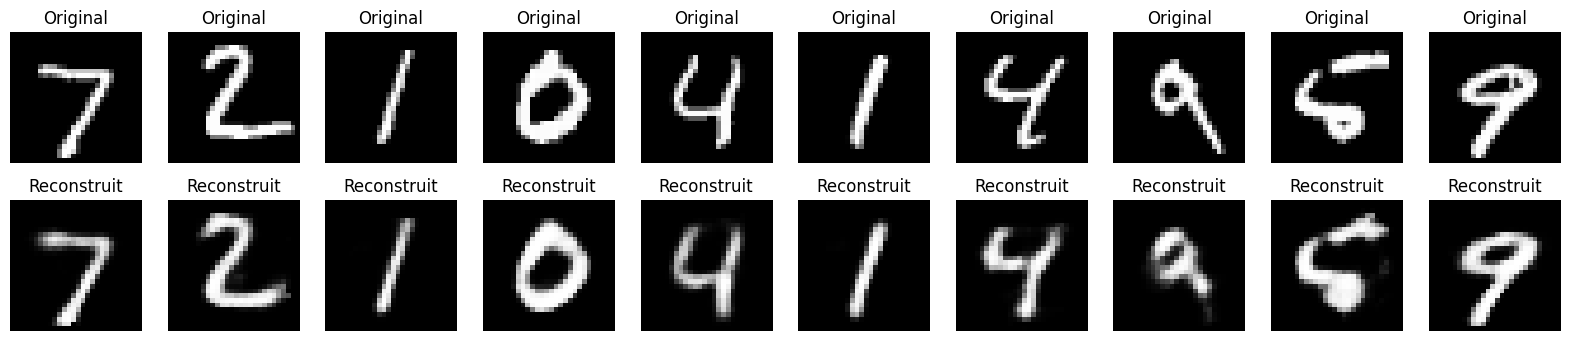

In [20]:
n = 10  # Nombre d'images à afficher
plt.figure(figsize=(20, 4))
for i in range(n):
    # Image originale
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Image reconstruite
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruit")
    plt.axis('off')

plt.show()